# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**Rozi Fatma
##### **Team Member 2 -**Dheeraj Patel
##### **Team Member 3 -**Mayank Gupta
##### **Team Member 4 -**Vishal Yadav
##### **Team Member 5 -**Khushboo Yadav

# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. My work includes various plots and graphs , visualizations , feature engineering , ensemble techniques , different ML algorithms with their respective parameter tuning , analysis and trends . Predictions are of 6 weeks of daily sales for 1,115 stores located across Germany.

# **GitHub Link -**

# **Problem Statement**


1- What are the co-relation between the different vaiables?

2- Checking out the opening & closing of the store on daily basis i.e (day of week)?

3- What is the impact of promotion on sales?

4- What is the trend of monthly sales over the year?

5- Finding out the effect of School holiday on sale?

6- Finding out the effect of State holiday on sale?

7- Checking the Distribution of different store types?

8- Whats are the total sales per year?

9- What are the total store types in the dataset, total sales of the store type, total number of customers, average sales of the store types, average spending of the customer. average customer per store?

10- What is the effect of promotion on sales during the years?

11- Dealing with the outliers of the given dataset?

12- Finding out the distribution of our numerical feature to know about the skewness of the data?

13- Chceking the multicolinearity among the independent feature and dealing with it?

14- Doing transformation on our independent and dependent features for standarisation?

15- Checking out the impact of linear regression model  on our dataset?

16- Lasso Regression Analysis 

17- Decision tree regression analysis

18- RandomForest Regression analysis 



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [ ]:
# Load Dataset
df_store = pd.read_csv('/content/store.csv')
df_rossmann=pd.read_csv('/content/Rossmann Stores Data.csv')

Analysing the rossmann dataset:


In [ ]:
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [ ]:
df_rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1
1017208,1115,2,01-01-2013,0,0,0,0,a,1


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1
1017208,1115,2,01-01-2013,0,0,0,0,a,1


#checking information about the dataset

In [ ]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#checking information of data such as column, row and datatype:
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   

In [ ]:
#checking null values
df_rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

there are no null values in the dataset


#descriptive statistics of the dataset:

In [ ]:
#summary of statistics:
df_rossmann.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


the above given data is numerical data in the column

In [ ]:
df_rossmann.describe(include=['object','category'])

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,31-07-2015,0
freq,1115,855087


,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,31-07-2015,0
freq,1115,855087


the above given data is a categorical data 

In [ ]:
#no. of stores in the dataset
df_rossmann['Store'].nunique()

1115

1115

In [ ]:
# taking counting number of each catagory 
df_rossmann['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#There are two types of datatype found: one is integer and the other is string
#So there is neccesity to convert a integer into string as there is only one integer value
df_rossmann['StateHoliday'].replace(0,'0',inplace=True) 

In [ ]:
#value counts of state holiday columns
df_rossmann['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#Finding out the time duration of sales for which the data is given
print(df_rossmann['Date'].min(),'initial_date')
print(df_rossmann['Date'].max(),'final_date')


01-01-2013 initial_date
31-12-2014 final_date
01-01-2013 initial_date
31-12-2014 final_date


In [ ]:
#lets convert the date datatype to datetime datatype
df_rossmann["Date"]=pd.to_datetime(df_rossmann['Date'])
print((df_rossmann['Date'].max())-(df_rossmann['Date'].min()))


1070 days 00:00:00
1070 days 00:00:00


In [ ]:
#extracting year,month,day and week of year from "Date"
df_rossmann['year']=df_rossmann['Date'].dt.year
df_rossmann['month']=df_rossmann['Date'].dt.month
df_rossmann['day']=df_rossmann['Date'].dt.day
df_rossmann['week_of_year']=df_rossmann['Date'].dt.weekofyear

In [ ]:
df_rossmann.sort_values(['Date','Store'],inplace=True,ascending=[False,True])

In [ ]:
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year
21185,1,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50
21186,2,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50
21187,3,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50
21188,4,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50
21189,5,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year
21185,1,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50
21186,2,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50
21187,3,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50
21188,4,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50
21189,5,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50


#EDA ON ROSSMANN DATASET

<AxesSubplot:>

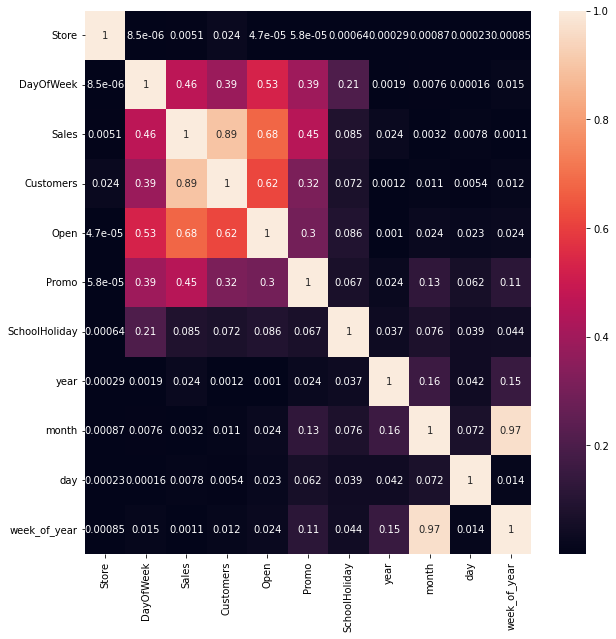

<AxesSubplot:>

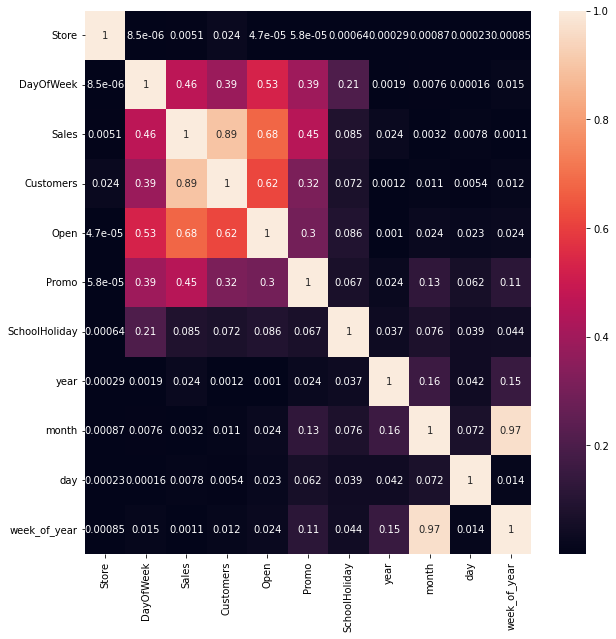

In [ ]:
#Lets finding out the correlation between diffrent varriables
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(abs(df_rossmann.corr()),cmap='rocket',annot=True)


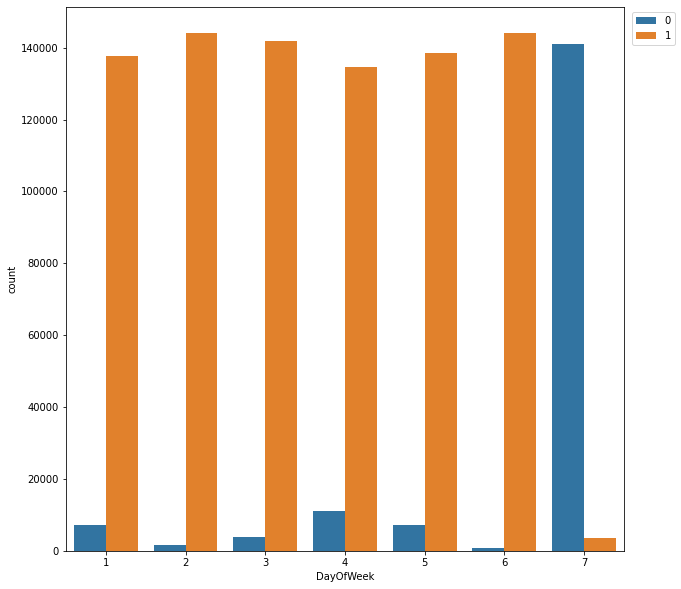

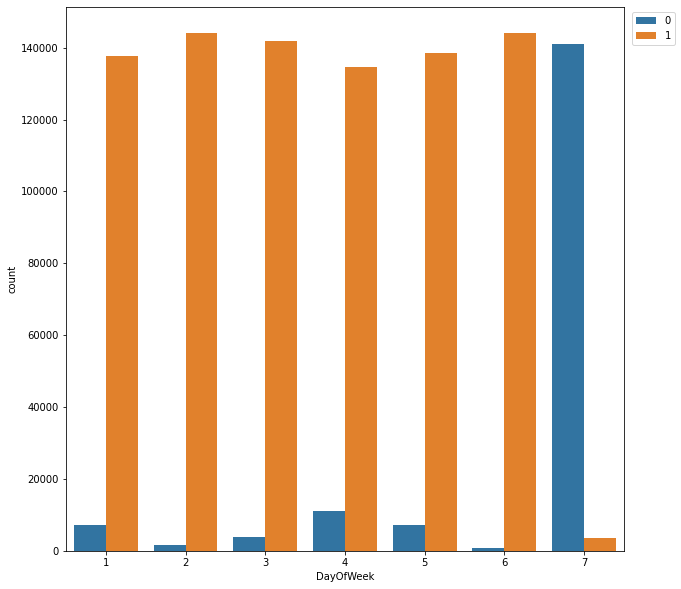

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.countplot(x='DayOfWeek',hue='Open',data=df_rossmann)
ax.legend(bbox_to_anchor=(1.1,1))

#it is seen that mostly stores are closed on sunday

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

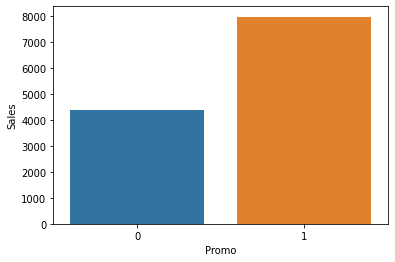

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

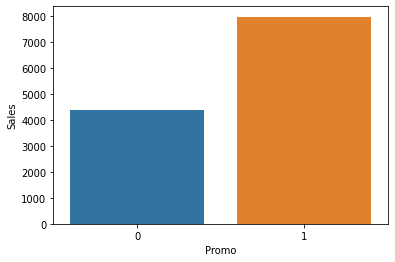

In [ ]:
#impact of promo on sales
Promo_sales=pd.DataFrame(df_rossmann.groupby('Promo')['Sales'].mean())
sns.barplot(x=Promo_sales.index,y=Promo_sales['Sales'])

according to this we can say that sales are more when there is promotion

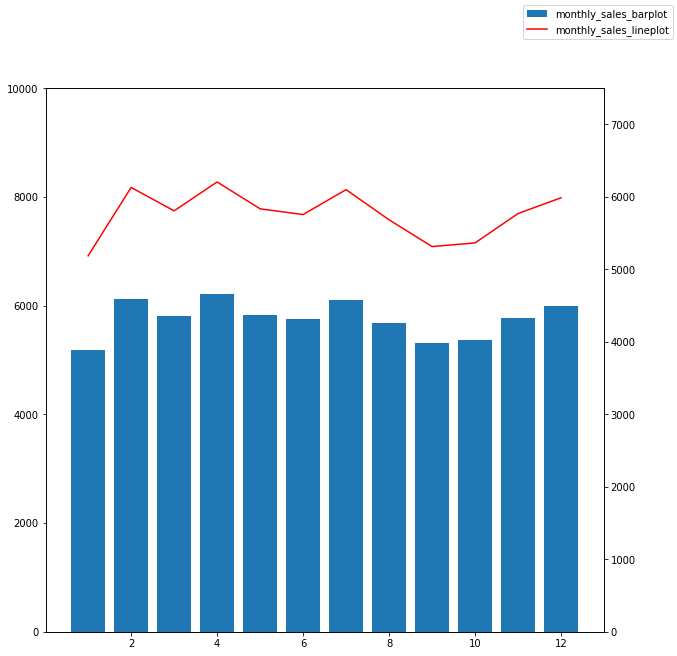

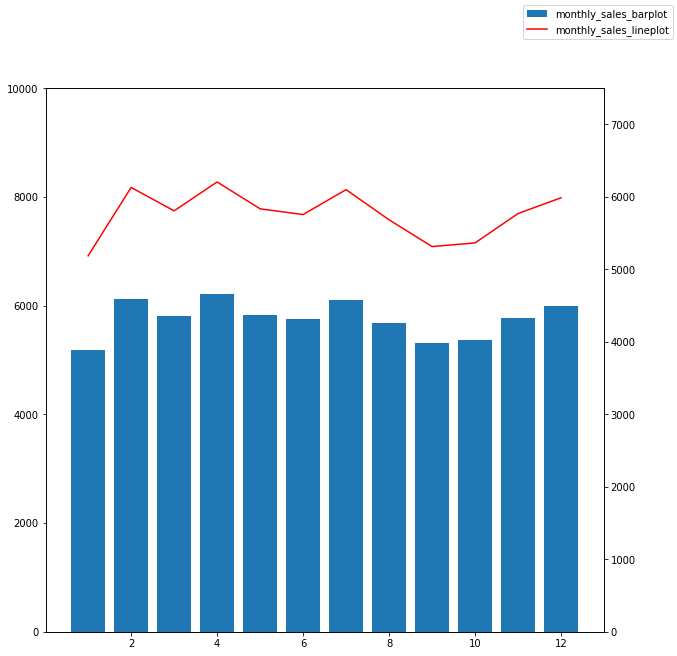

In [ ]:
monthly_sales=df_rossmann.groupby('month')['Sales'].mean()
fig,ax=plt.subplots(figsize=(10,10))
ax.bar(monthly_sales.index,monthly_sales,label='monthly_sales_barplot')
ax2=ax.twinx()
ax.set_ylim(0,10000)
ax2.plot(monthly_sales.index,monthly_sales,alpha=1,c='red',label='monthly_sales_lineplot')
ax2.set_ylim(0,7500)
fig.legend()
plt.show()

so from this we can infer that in the month of november and december sales are increasing rapidly due to festivals

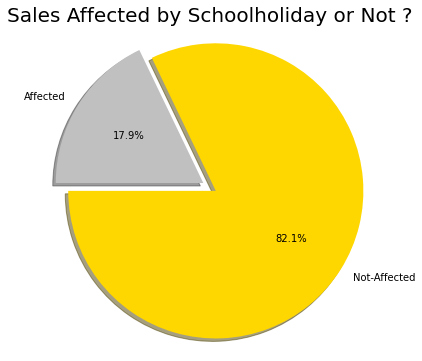

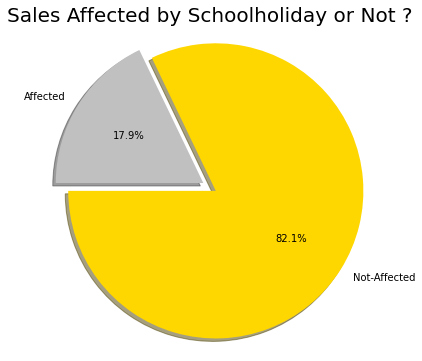

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = df_rossmann.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

it is seen the sales affected by school holiday's is 18 percent 

Tranforming varriable state holiday

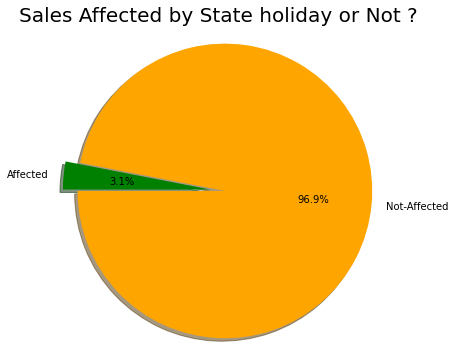

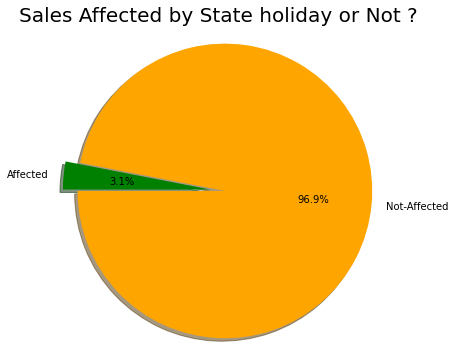

In [ ]:
df_rossmann["StateHoliday"] = df_rossmann["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
df_rossmann.StateHoliday.value_counts()
labels = 'Not-Affected' , 'Affected'
sizes = df_rossmann.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

so we can say that school holidays has more impact on sales and state holidays does not affect much

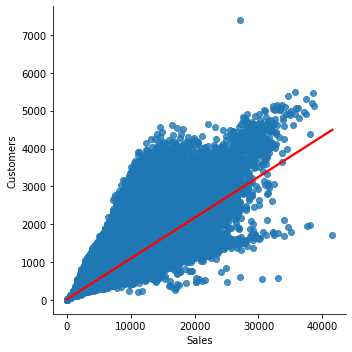

In [ ]:
sns.lmplot(x= 'Sales' , y ='Customers',data=df_rossmann, palette='seismic', height=5,aspect=1, line_kws={'color':'red'});

from this we can conclude that there is positive correlation between sales and customers

#Analysing the store dataset

In [ ]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Handling the null values

In [ ]:
df_store[df_store['CompetitionDistance'].isna()]
#since we find that many of the feature include null values hence we shall remove the null rows
df_store['CompetitionDistance'].dropna(inplace=True)
df_store[df_store['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


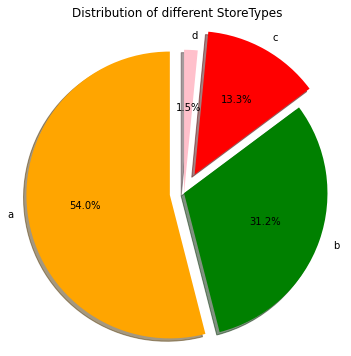

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = df_store.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

It is seen that majority of store are of 'a' type. 

Remove features with high percentages of missing values
we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values

In [ ]:
df_store.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

In [ ]:
df_store.dropna(inplace=True)

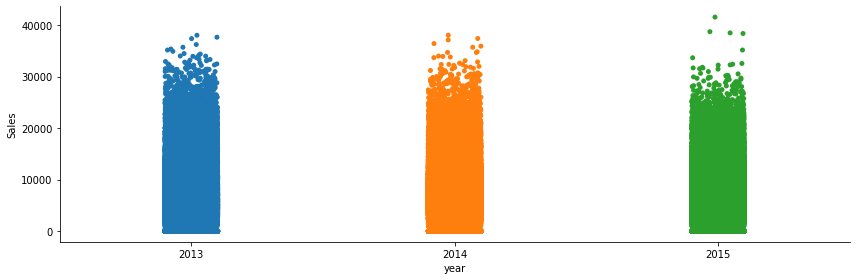

In [ ]:
sns.catplot(x='year',y='Sales',data=df_rossmann, height=4, aspect=3);


#Merging two dataset

In [ ]:
df_merged=df_rossmann.merge(df_store,how='left',on='Store')

In [ ]:
#lets view the top 5 rows of our merged dataset
df_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50,c,a,1270.0,0.0
1,2,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50,a,a,570.0,1.0
2,3,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50,a,a,14130.0,1.0
3,4,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50,c,c,620.0,0.0
4,5,7,2015-12-07,0,0,0,0,0,0,2015,12,7,50,a,a,29910.0,0.0


In [ ]:
#lets view the bottom 5 rows of our merged dataset
df_merged.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2
1017204,1111,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,a,a,1900.0,1.0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,c,c,1880.0,0.0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,a,c,9260.0,0.0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,a,c,870.0,0.0
1017208,1115,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,d,c,5350.0,1.0


plotting the heatmap of merged dataset

<AxesSubplot:>

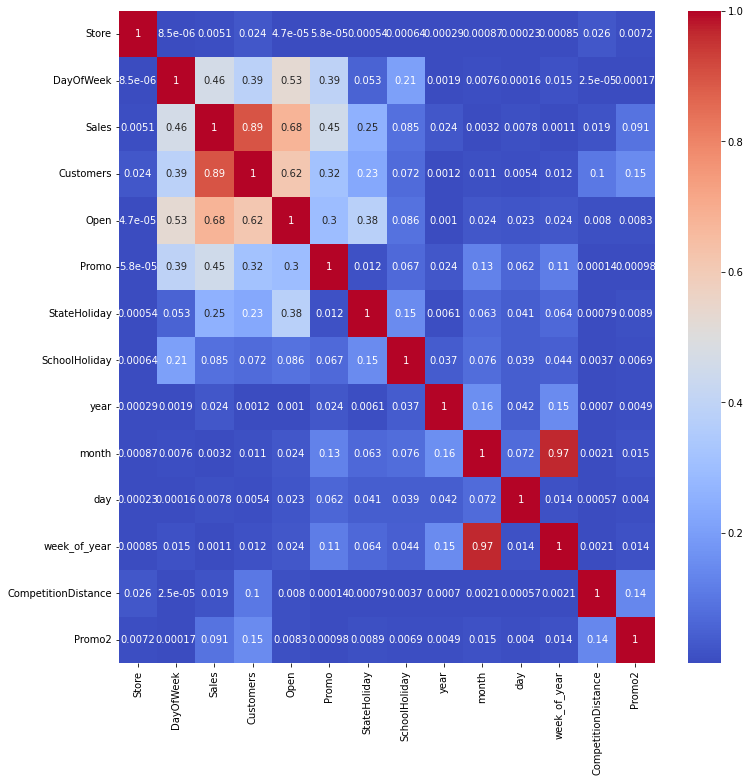

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(abs(df_merged.corr()),cmap='coolwarm',annot=True)

In [ ]:
df_merged["avg_customer_sales"]=df_merged["Sales"]/df_merged["Customers"]

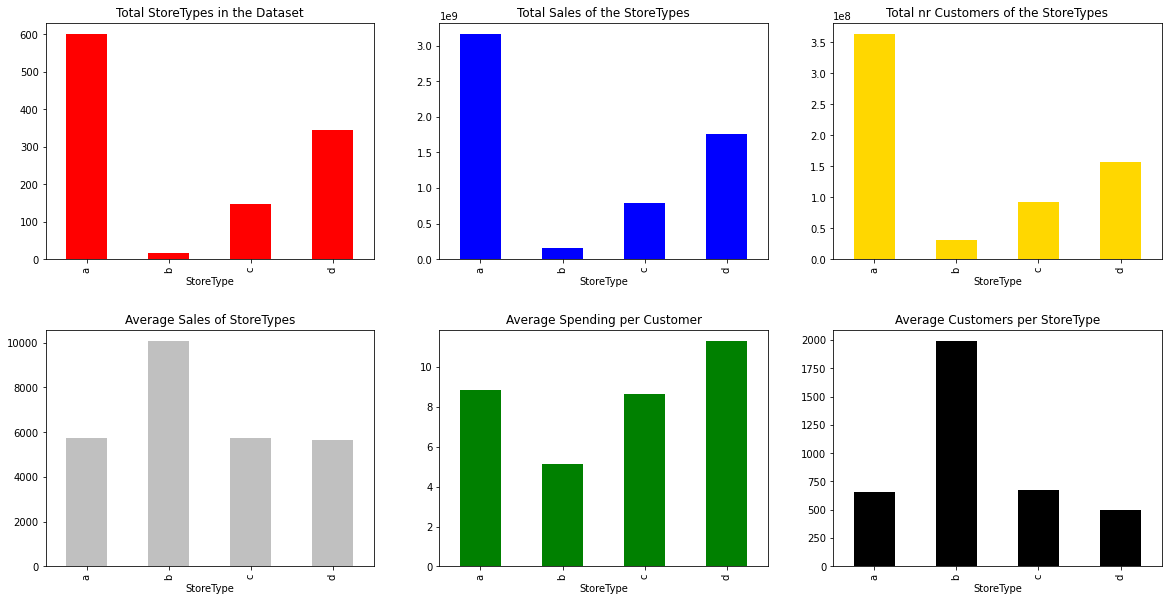

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

df_store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset",color='red')
df_merged.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes",color='blue')
df_merged.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total no. Customers of the StoreTypes",color='gold')
df_merged.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes",color='silver')
df_merged.groupby("StoreType")["avg_customer_sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer",color='green')
df_merged.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType",color='black')

plt.subplots_adjust(hspace = 0.3)
plt.show()



1. As we can see from the graph the store type A has the most stores,sales,customers
2.Storetype B has the highest average sales and average customers
3.Storetype D has the best average spendings per customer. 




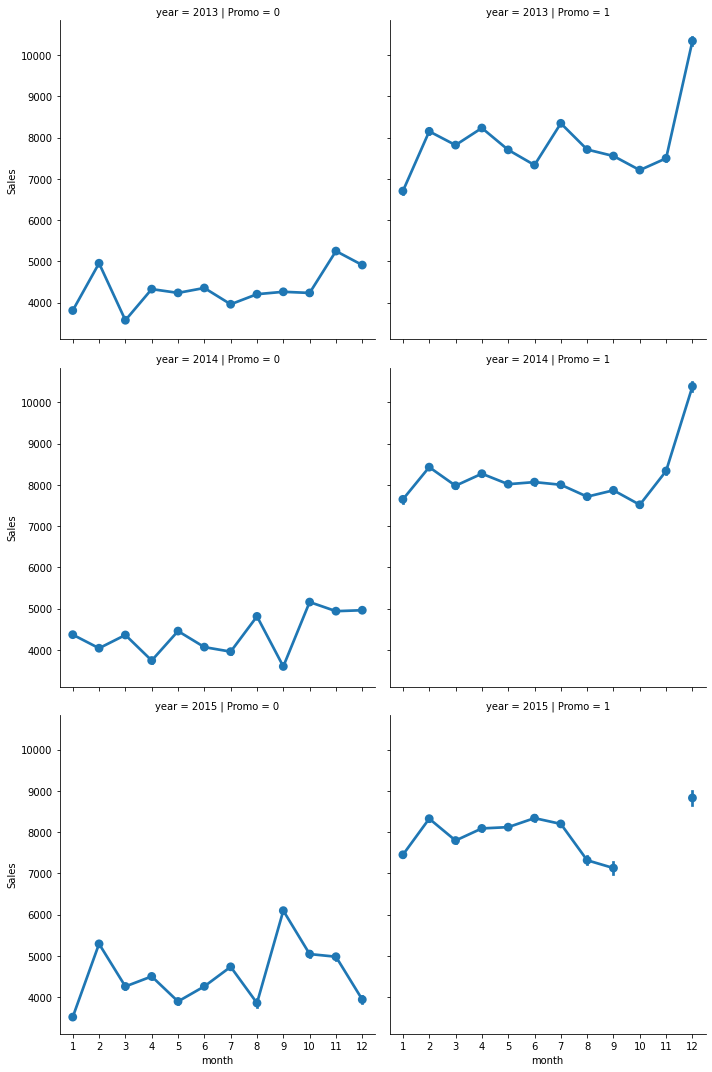

In [ ]:
#lets check the effect of promotion on sales
sns.factorplot(data = df_merged, x ="month", y = "Sales",col = 'Promo',row = "year")

so we can see that if the stores are having promotion the sales are higher.

Overall the store promotion sellings are higher than the seasonal promotion

In [ ]:
#when the stores are closed they will not generate sales so we will remove that part of the dataset
df_merged=df_merged[df_merged['Open']!=0]

In [ ]:
#since the open column now has only one open values through all the rows 
#so we shall remove this column as it is insignificant for our analysis
df_merged.drop('Open',axis=1,inplace=True)
df_merged

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
84,85,7,2015-12-07,13183,1615,0,0,0,2015,12,7,50,b,a,1870.0,0.0,8.162848
121,122,7,2015-12-07,3689,485,0,0,0,2015,12,7,50,a,c,58260.0,0.0,7.606186
208,209,7,2015-12-07,2488,283,0,0,0,2015,12,7,50,a,c,11680.0,1.0,8.791519
258,259,7,2015-12-07,15585,3005,0,0,0,2015,12,7,50,b,b,210.0,0.0,5.186356
261,262,7,2015-12-07,32271,4623,0,0,0,2015,12,7,50,b,a,1180.0,0.0,6.980532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,b,a,150.0,0.0,5.962898
1016827,733,2,2013-01-01,10765,2377,0,1,1,2013,1,1,1,b,b,860.0,0.0,4.528818
1016863,769,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,b,b,840.0,1.0,4.034455
1017042,948,2,2013-01-01,4491,1039,0,1,1,2013,1,1,1,b,b,1430.0,0.0,4.322425


In [ ]:
#checking if there is any open store with zero sales
df_merged[df_merged['Sales']==0]['Store'].count()

54

In [ ]:
#thus removing the above part of data to remove the bias
df_merged=df_merged[df_merged['Sales']!=0]
df_merged

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
84,85,7,2015-12-07,13183,1615,0,0,0,2015,12,7,50,b,a,1870.0,0.0,8.162848
121,122,7,2015-12-07,3689,485,0,0,0,2015,12,7,50,a,c,58260.0,0.0,7.606186
208,209,7,2015-12-07,2488,283,0,0,0,2015,12,7,50,a,c,11680.0,1.0,8.791519
258,259,7,2015-12-07,15585,3005,0,0,0,2015,12,7,50,b,b,210.0,0.0,5.186356
261,262,7,2015-12-07,32271,4623,0,0,0,2015,12,7,50,b,a,1180.0,0.0,6.980532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,b,a,150.0,0.0,5.962898
1016827,733,2,2013-01-01,10765,2377,0,1,1,2013,1,1,1,b,b,860.0,0.0,4.528818
1016863,769,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,b,b,840.0,1.0,4.034455
1017042,948,2,2013-01-01,4491,1039,0,1,1,2013,1,1,1,b,b,1430.0,0.0,4.322425


In [ ]:
#creating a copy of the dataset
df=df_merged.copy()

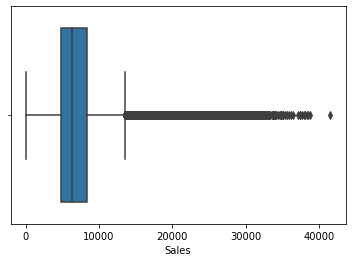

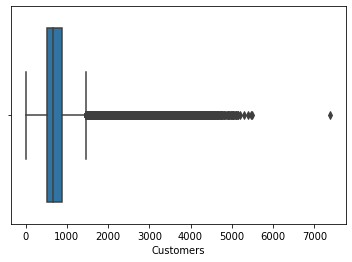

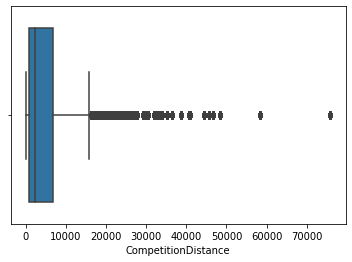

In [ ]:
#checking of outliers in our sales column
t=['Sales','Customers','CompetitionDistance']
for col in t:
  fig,ax=plt.subplots()
  sns.boxplot(x=col,data=df)

for sales,customers and competitiondistance column it is seen from the box plot that there are some which makes our analysis biased/ it may give more noise in our prediction.


In [ ]:
#dealing the outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
for i in t:
    df=remove_outlier(df,i)
df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
208,209,7,2015-12-07,2488,283,0,0,0,2015,12,7,50,a,c,11680.0,1.0,8.791519
309,310,7,2015-12-07,3459,263,0,0,0,2015,12,7,50,a,c,2290.0,1.0,13.152091
493,494,7,2015-12-07,8525,1214,0,0,0,2015,12,7,50,b,a,1260.0,0.0,7.022241
577,578,7,2015-12-07,6933,674,0,0,0,2015,12,7,50,d,a,12700.0,0.0,10.286350
681,682,7,2015-12-07,7840,1336,0,0,0,2015,12,7,50,b,a,150.0,0.0,5.868263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016606,512,2,2013-01-01,2646,625,0,1,1,2013,1,1,1,b,b,590.0,1.0,4.233600
1016770,676,2,2013-01-01,3821,777,0,1,1,2013,1,1,1,b,b,1410.0,0.0,4.917632
1016776,682,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,b,a,150.0,0.0,5.962898
1016863,769,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,b,b,840.0,1.0,4.034455


Removing the distinct columns

In [ ]:
df.drop('Store',axis=1,inplace=True)

In [ ]:
df

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
208,7,2015-12-07,2488,283,0,0,0,2015,12,7,50,a,c,11680.0,1.0,8.791519
309,7,2015-12-07,3459,263,0,0,0,2015,12,7,50,a,c,2290.0,1.0,13.152091
493,7,2015-12-07,8525,1214,0,0,0,2015,12,7,50,b,a,1260.0,0.0,7.022241
577,7,2015-12-07,6933,674,0,0,0,2015,12,7,50,d,a,12700.0,0.0,10.286350
681,7,2015-12-07,7840,1336,0,0,0,2015,12,7,50,b,a,150.0,0.0,5.868263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016606,2,2013-01-01,2646,625,0,1,1,2013,1,1,1,b,b,590.0,1.0,4.233600
1016770,2,2013-01-01,3821,777,0,1,1,2013,1,1,1,b,b,1410.0,0.0,4.917632
1016776,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,b,a,150.0,0.0,5.962898
1016863,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,b,b,840.0,1.0,4.034455


categorising into numerical and categorical varriables

In [ ]:
numerical_varriable_list=(list(df.describe().columns))
numerical_varriable_list

['DayOfWeek',
 'Sales',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'year',
 'month',
 'day',
 'week_of_year',
 'CompetitionDistance',
 'Promo2',
 'avg_customer_sales']

In [ ]:
categorical_varriable_list=list(df.describe(include=['object','category']))
categorical_varriable_list

['StoreType', 'Assortment']

distribution of our numerical varriable

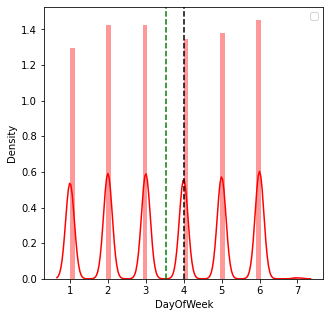

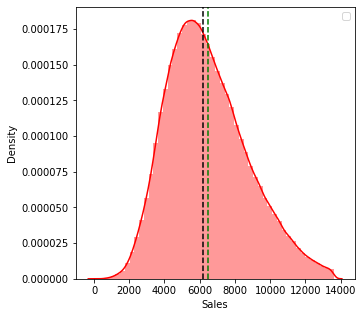

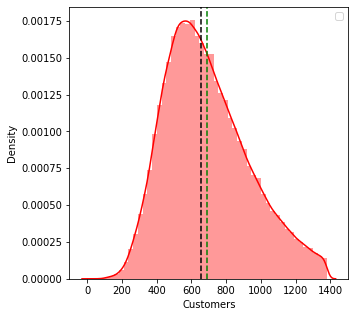

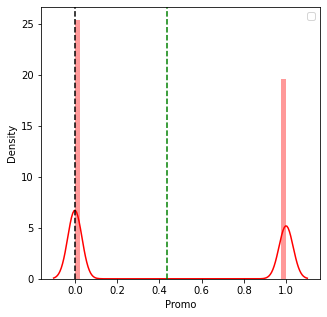

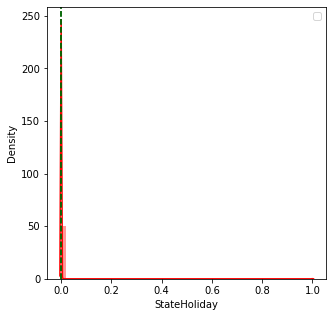

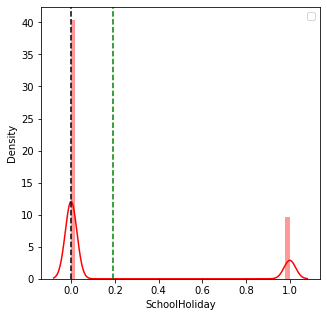

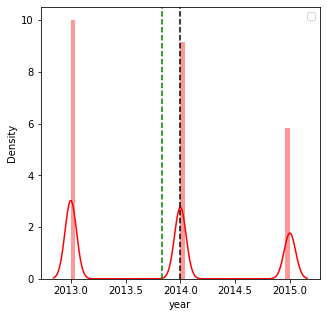

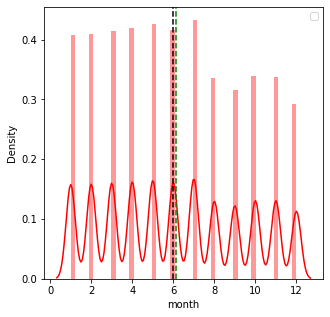

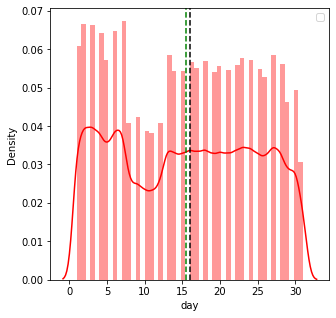

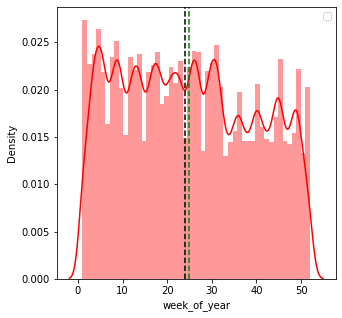

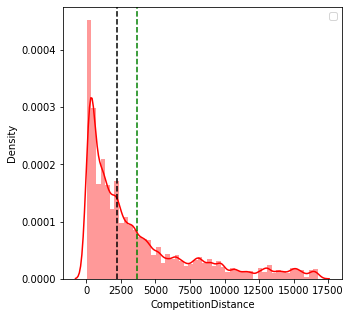

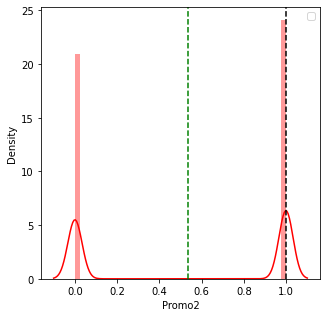

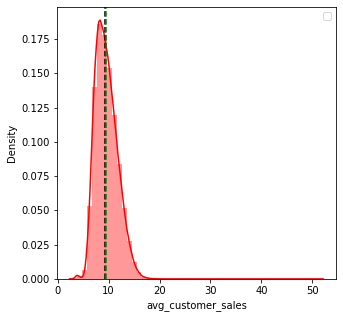

In [ ]:
for col in numerical_varriable_list:
    fig,ax=plt.subplots(figsize=(5,5))
    sns.distplot(df[col],color='red')
    ax.axvline(df[col].median(),color='black',ls='--')
    ax.axvline(df[col].mean(),color='green',ls='--')
    ax.legend()
    plt.show()

it is seen from the above graphs that there is not much skewness in our data.
Another reason behind the less skewness of our data is because of removal of outliers as it does not shifts our mean data predominantly.So this means that the mean and median are almost symmetrical and we need not do any transformation on our data.
Hence it is ready for our analysis.

In [ ]:
independent_numerical_varriable=list(set(numerical_varriable_list)-{'Sales'})

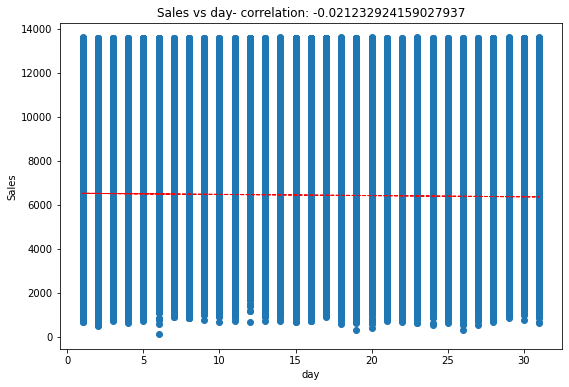

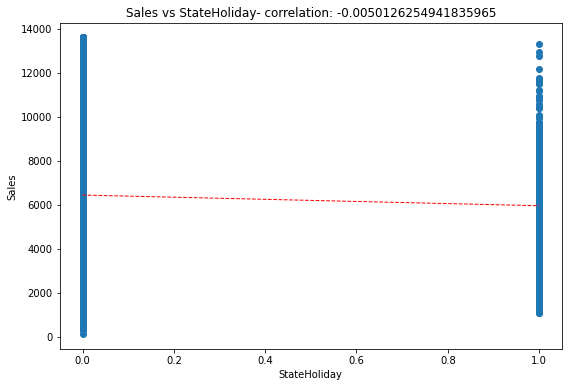

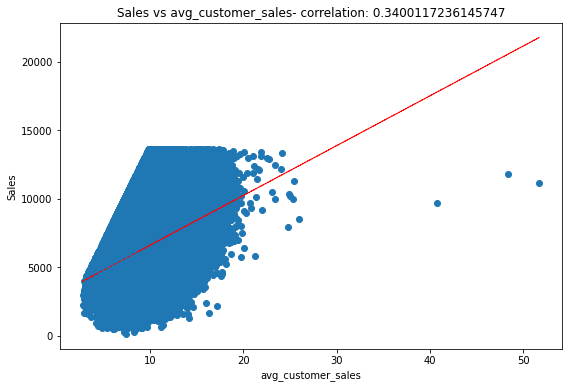

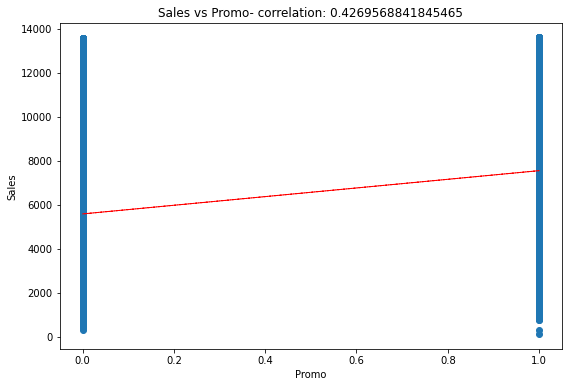

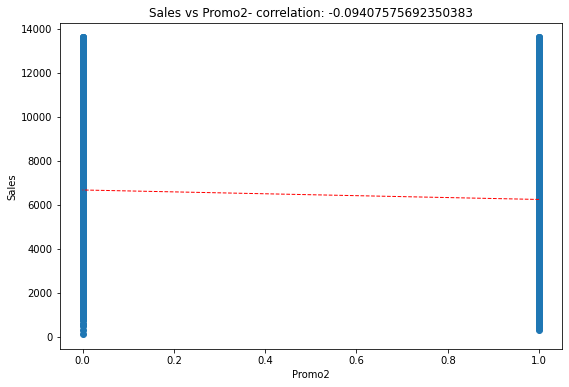

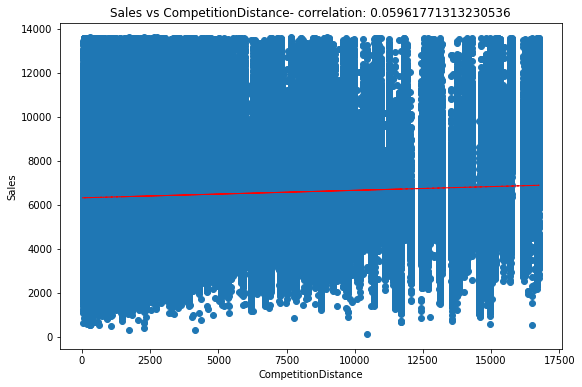

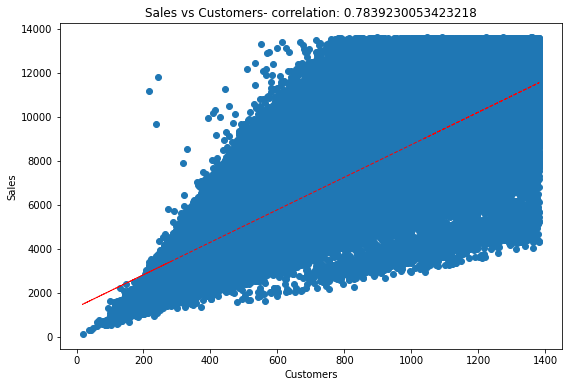

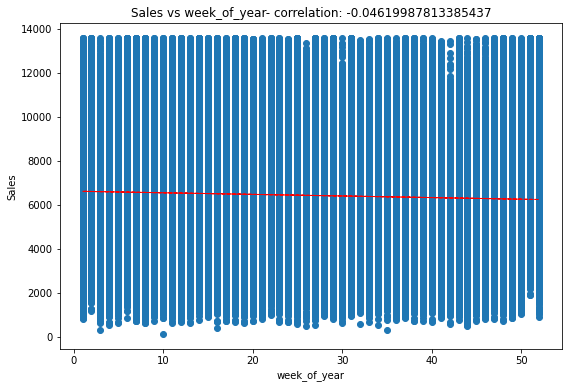

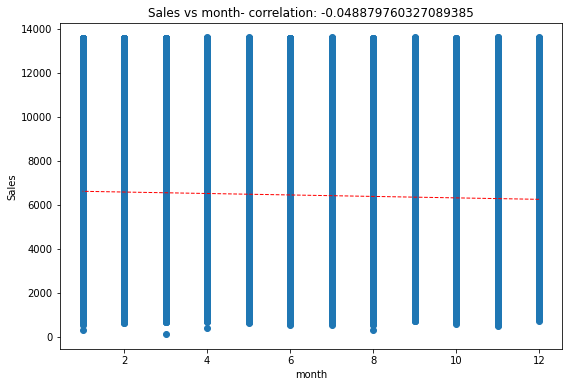

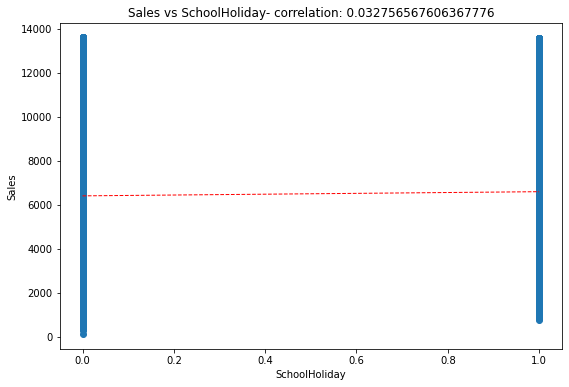

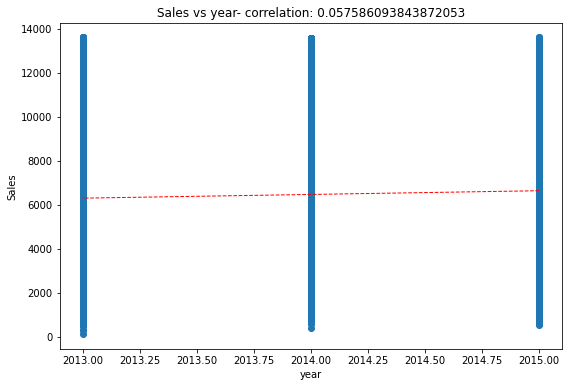

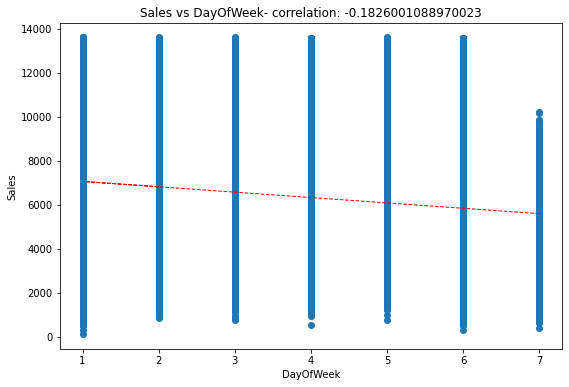

In [ ]:
for col in independent_numerical_varriable:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['Sales']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Sales')
  ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col],df['Sales'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

#lets do the heatmap of our independent and dependent varriables

<AxesSubplot:>

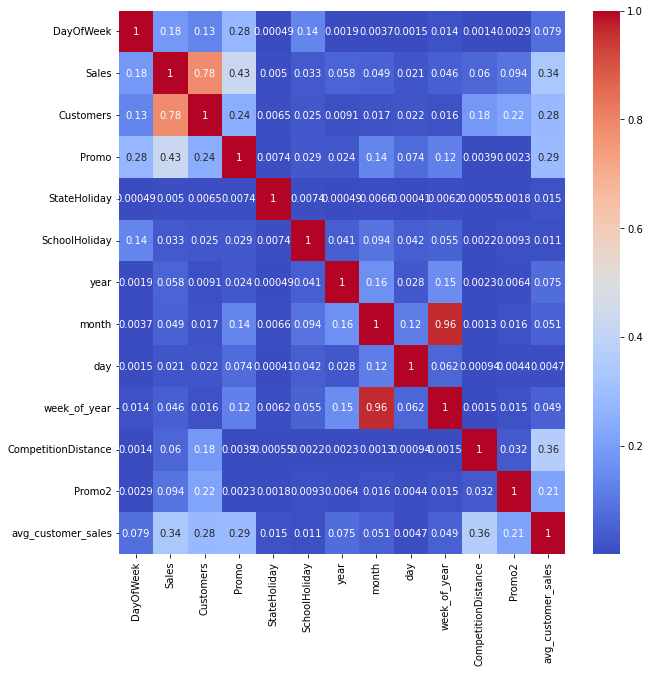

In [ ]:
#following heatmap represents the correlation between the features:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True,cmap='coolwarm')

so from the above correlation matrix we can infer that there is not much correlation between features except the dependency of feature between sales and customer

#checking for multicollinearity among the independent features and dealing with it

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in 'Sales']])

,variables,VIF
0,DayOfWeek,5.882442
1,Customers,11.736618
2,Promo,2.415628
3,StateHoliday,1.001123
4,SchoolHoliday,1.301856
5,year,61.345603
6,month,62.140329
7,day,4.244750
8,week_of_year,55.457289
9,CompetitionDistance,2.208153


In [ ]:
#since the vif of year,month and weak_of_year is predominantly higher so we shall remove it as it is dependent on the independent features
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','year','month','weak_of_year']]])

,variables,VIF
0,DayOfWeek,5.040900
1,Customers,6.930498
2,Promo,2.349902
3,StateHoliday,1.000913
4,SchoolHoliday,1.263004
5,day,3.793245
6,week_of_year,3.781538
7,CompetitionDistance,2.201035
8,Promo2,2.335114
9,avg_customer_sales,15.468908


In [ ]:
#since after doing the second iteration of vif analysis we found that the vif for average customer sales is highest we shall remove this column
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','year','month','weak_of_year','avg_customer_sales']]])


,variables,VIF
0,DayOfWeek,4.317963
1,Customers,6.360904
2,Promo,1.992285
3,StateHoliday,1.000737
4,SchoolHoliday,1.254330
5,day,3.492307
6,week_of_year,3.522954
7,CompetitionDistance,1.754567
8,Promo2,1.994664


In [ ]:
#now talking only those numerical independent features which are useful for our analysis from vif test obtained
numerical_independent_features=list(set(independent_numerical_varriable)-{'year','month','weak_of_year','avg_customer_sales'})
numerical_independent_features

['day',
 'StateHoliday',
 'Promo',
 'Promo2',
 'CompetitionDistance',
 'Customers',
 'week_of_year',
 'SchoolHoliday',
 'DayOfWeek']

#Analysis of categorigal features

In [ ]:
categorical_features=list(df.describe(include=['object','category']).columns)

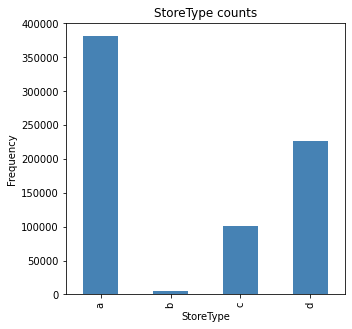

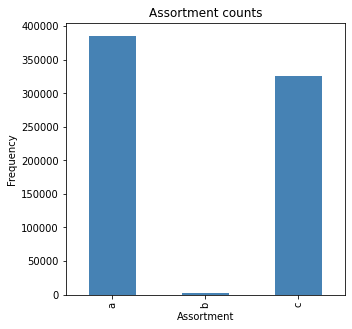

In [ ]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig,ax=plt.subplots(figsize=(5,5))
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


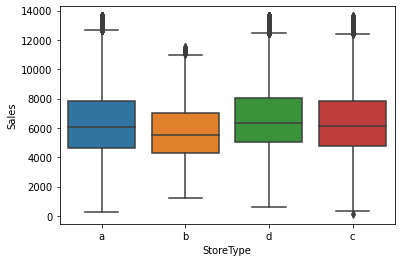

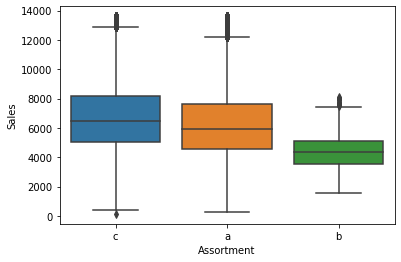

In [ ]:
t=categorical_features
for col in t:
  fig,ax=plt.subplots()
  sns.boxplot(x=col,y='Sales',data=df)

In [ ]:
#let us do the label encoding for categorical features
df=df.replace({'StoreType':{'a':1,'b':2,'c':3,'d':4},'Assortment':{'a':1,'b':2,'c':3}})
df

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
208,7,2015-12-07,2488,283,0,0,0,2015,12,7,50,1,3,11680.0,1.0,8.791519
309,7,2015-12-07,3459,263,0,0,0,2015,12,7,50,1,3,2290.0,1.0,13.152091
493,7,2015-12-07,8525,1214,0,0,0,2015,12,7,50,2,1,1260.0,0.0,7.022241
577,7,2015-12-07,6933,674,0,0,0,2015,12,7,50,4,1,12700.0,0.0,10.286350
681,7,2015-12-07,7840,1336,0,0,0,2015,12,7,50,2,1,150.0,0.0,5.868263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016606,2,2013-01-01,2646,625,0,1,1,2013,1,1,1,2,2,590.0,1.0,4.233600
1016770,2,2013-01-01,3821,777,0,1,1,2013,1,1,1,2,2,1410.0,0.0,4.917632
1016776,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,2,1,150.0,0.0,5.962898
1016863,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,2,2,840.0,1.0,4.034455


In [ ]:
#now combining the categorical_features and numerical_independent_fetaures
independent_features=categorical_features+numerical_independent_features
independent_features

['StoreType',
 'Assortment',
 'day',
 'StateHoliday',
 'Promo',
 'Promo2',
 'CompetitionDistance',
 'Customers',
 'week_of_year',
 'SchoolHoliday',
 'DayOfWeek']

In [ ]:
#now standardising the independent features:
x=df[independent_features].apply(zscore)
x

,StoreType,Assortment,day,StateHoliday,Promo,Promo2,CompetitionDistance,Customers,week_of_year,SchoolHoliday,DayOfWeek
208,-0.903131,1.088785,-0.947748,-0.023622,-0.879107,0.931013,1.996931,-1.680892,1.736041,-0.488264,2.025568
309,-0.903131,1.088785,-0.947748,-0.023622,-0.879107,0.931013,-0.349227,-1.763390,1.736041,-0.488264,2.025568
493,-0.174889,-0.921104,-0.947748,-0.023622,-0.879107,-1.074099,-0.606580,2.159407,1.736041,-0.488264,2.025568
577,1.281595,-0.921104,-0.947748,-0.023622,-0.879107,-1.074099,2.251786,-0.068049,1.736041,-0.488264,2.025568
681,-0.174889,-0.921104,-0.947748,-0.023622,-0.879107,-1.074099,-0.883922,2.662647,1.736041,-0.488264,2.025568
...,...,...,...,...,...,...,...,...,...,...,...
1016606,-0.174889,0.083841,-1.614683,42.334009,-0.879107,0.931013,-0.773985,-0.270170,-1.650800,2.048072,-0.901383
1016770,-0.174889,0.083841,-1.614683,42.334009,-0.879107,-1.074099,-0.569102,0.356818,-1.650800,2.048072,-0.901383
1016776,-0.174889,-0.921104,-1.614683,42.334009,-0.879107,-1.074099,-0.883922,-0.513540,-1.650800,2.048072,-0.901383
1016863,-0.174889,0.083841,-1.614683,42.334009,-0.879107,0.931013,-0.711520,2.299654,-1.650800,2.048072,-0.901383


In [ ]:
#now doing the log transformation on the dependent feature
dependent_features='Sales'
y=pd.DataFrame(np.log10(df[dependent_features]))
y

,Sales
208,3.395850
309,3.538951
493,3.930694
577,3.840921
681,3.894316
...,...
1016606,3.422590
1016770,3.582177
1016776,3.528274
1016863,3.701999


#Conclusion of EDA

1. Features like Customer and sales, open and sales, open and customer, open and DayOfWeek are correlated.

2. It is found that from Monday to Saturday the stores are open and on Sundays the stores are close.

3. It was found the the due to promotion the sales were almost doubled.

4. In the month of November and December the sales were increasing rapidly due to festivals.

5. 18% sales were affected by school holidays

6. Effect of State holiday on sales was negligible.

7. Majority of the stores are of 'A' type.

8. Sales were almost same for 2013 and 2014, while the sales were reduced in the year of 2015.

9. The store type A has the most stores,sales,customers. Storetype B has the highest average sales and average customers. Storetype D has the best average spendings per customer.

10. If the stores are having promotion the sales are higher.Overall the store promotion sellings are higher than the seasonal promotion.

11. It is seem that there is some outliers in the Sales, Customer and Competition distance from the box plot obtained which makes our analysis biased. So finally we removed the ouliers, using functions.

12. It is seen from the above graphs that there is not much skewness in our data. Another reason behind the less skewness of our data is because of removal of outliers as it does not shifts our mean data predominantly.So this means that the mean and median are almost symmetrical and we need not do any transformation on our data.

13. We found that the VIF for year, month, average customer sales was very high so removed it. As it was dependent on the another column.

14. By Linear modeling on our dataset we infer that the MSE was *1559270.5*, RMSE was *1248.71*, R2 was *0.70215*, adjusted R2 was *0.70212*

#lets do the linear regression modeling on our dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(570944, 11)
(142737, 11)


In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7474905566762433

In [ ]:
reg.coef_

array([[ 2.94514916e-02,  1.03221746e-02,  1.51758730e-03,
        -2.32947420e-03,  3.61529676e-02,  1.09830920e-02,
         2.54910933e-02,  1.30470386e-01, -1.19565624e-05,
         1.32786240e-03, -2.26484375e-03]])

In [ ]:
reg.intercept_

array([3.78071241])

In [ ]:
y_pred = reg.predict(X_test)
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1559270.5556068274
RMSE : 1248.7075540761446
R2 : 0.7021478279528723
Adjusted R2 :  0.7021248721014621


#Now doing the lasso regression analysis for reducing the overfit issues on our dataset

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7474870897481185

In [ ]:
lasso.coef_

array([ 0.02936791,  0.01026563,  0.0014147 , -0.00222761,  0.03610086,
        0.01085662,  0.02538826,  0.13032566, -0.        ,  0.0012416 ,
       -0.00221178])

In [ ]:
y_pred_lasso=lasso.predict(X_test)
r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7023722042325222
Adjusted R2 :  0.7023492656740815


#lets do the cross validation and hyperparameter tuning for lasso using gridsearchcv module

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-30,1e-25,1e-20,1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-30, 1e-25, 1e-20, 1e-15, 1e-13, 1e-10,
                                   1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 60, 100,
                                   0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.0066573012378007695


In [ ]:
y_pred_lasso_cv = lasso_regressor.predict(X_test)
y_pred_lasso_cv

array([3.89575843, 3.64228954, 3.74332671, ..., 3.85544666, 3.77911515,
       3.83798289])

In [ ]:
r2 = r2_score(10**(y_test), 10**(y_pred_lasso_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7021706542403738
Adjusted R2 :  0.702147700148215


as it is seen that the alpha value predicted by cross validation is tending towards zero so we the penalty term will be close to zero.Hence we can infer that our model is not overfitting.Therefore we need not go for ridge and elastic net regression analysis. 

In [ ]:
#plotting the linear regression graph for real and predicted varriable y
simple_lr_pred = y_pred_lasso_cv[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame([(y_pred_lasso_cv[:100]),((y_test[:100])['Sales'].values)]).T
dataset_lr.rename(columns={0:'Real',1:'predicted'},inplace=True)

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=abs(dataset_lr['Real']-dataset_lr['predicted'])
dataset_lr

,Real,predicted,diff
0,3.895758,3.851809,0.043950
1,3.642290,3.564192,0.078097
2,3.743327,3.846523,0.103196
3,3.716319,3.877026,0.160707
4,3.879572,3.836197,0.043374
...,...,...,...
95,3.891363,3.597366,0.293997
96,3.858588,3.868115,0.009527
97,3.720271,3.777137,0.056866
98,3.598168,3.597476,0.000692


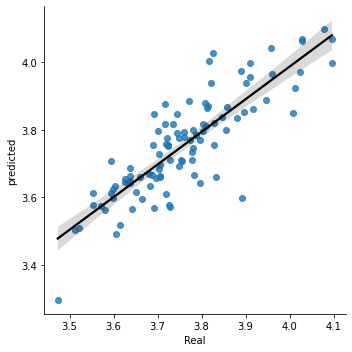

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='predicted', data=dataset_lr, line_kws={'color': 'black'});

#let us now start the decision tree regression analysis

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=7,min_samples_split=6)
decision_tree.fit(X_train, y_train)
v_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)

MSE = mean_squared_error(y_test,v_pred_dt)
print("MSE:", MSE)

MAE = mean_absolute_error(y_test, v_pred_dt)
print("MAE:", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

r2 = r2_score(y_test, v_pred_dt)
print("R2 :", r2)

MSE: 0.0060396431848818485
MAE: 0.06161651072639518
RMSE : 0.07771514128457754
R2 : 0.7704948567108577


#now doing the hyperparameter tuning and cross validation for improving the r2 result

In [ ]:
dt_regressor = DecisionTreeRegressor()
param_grid = {'max_depth': [3,5,7,10],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9]}

grid_search = GridSearchCV(dt_regressor, param_grid,scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}


#Now updating the hyperparameter to obtain the best result of our analysis

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=4)
decision_tree.fit(X_train, y_train)
v_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)

MSE = mean_squared_error(y_test,v_pred_dt)
print("MSE:", MSE)

MAE = mean_absolute_error(y_test, v_pred_dt)
print("MAE:", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

r2 = r2_score(y_test, v_pred_dt)
print("R2 :", r2)

MSE: 0.0038435113116634637
MAE: 0.048683195592682936
RMSE : 0.06199605883976387
R2 : 0.8539473960109418


#Random Forest Regression analysis

In [ ]:
random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(X_train,y_train)
y_pred_rf = random_forest.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_rf)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

MAE=mean_absolute_error(y_test,y_pred_rf)
print("MAE :", MAE)

r2 = r2_score(y_test, y_pred_rf)
print("R2 :", r2)

MSE : 0.004364046410765401
RMSE : 0.06606092953301067
MAE : 0.0519172873209392
R2 : 0.834167174092293


#Cross validation and hyperparameter tuning for random forest using gridsearchcv 

In [ ]:
dt_rfr = RandomForestRegressor()
param_grid = {'n_estimators':[15,20,30],
              'max_depth': [5,8,10]}

Random_search = RandomizedSearchCV(dt_rfr, param_grid,scoring='neg_mean_squared_error',cv=2)
Random_search.fit(X_train,y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}


#now updating the hyperparameter values for better result

In [ ]:
random_forest = RandomForestRegressor(n_estimators = 100, max_depth=12)
random_forest.fit(X_train,y_train)
y_pred_rf = random_forest.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_rf)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

MAE=mean_absolute_error(y_test,y_pred_rf)
print("MAE :", MAE)

r2 = r2_score(y_test, y_pred_rf)
print("R2 :", r2)

MSE : 0.0026916756917963703
RMSE : 0.05188136169951951
MAE : 0.04047580379133148
R2 : 0.897716902071308


#Conclusion of Modeling

1. By Linear modeling on our dataset we infer that the MSE was *1559270.5*, RMSE was *1248.71*, R2 was *0.70215*, adjusted R2 was *0.70212*.

2. From Lasso regression analysis R2 was *0.70237*, adjusted R2 was *0.70349* which is a clear indication that our model does not overfit.

3. By decision tree analysis we found that MSE: 0.00384, MAE: 0.04868, RMSE : 0.06199, R2 : 0.85395

4. By Random forest analysis our model improved and the R2 was ***0.89771***, MSE : 0.00269, RMSE : 0.05188, MAE : 0.04048